<a href="https://colab.research.google.com/gist/ernestocl/c4b3a96d89f13cb055a75d3695a38b8e/project_bmw_solucion_ernesto_colas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT: BMW
## ALUMNO: ERNESTO COLAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos librería
import pandas as pd 
import numpy as np
import folium
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from imblearn.over_sampling import SMOTE
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
with open('/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulos master/Módulo 3 - Preprocesamiento/Joseph Gallart/bmw_pricing_v2.csv/bmw_pricing_v2.csv') as f:
    df = pd.read_csv(f)
f.close()
SEED = 42

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [ ]:
coche = pd.read_csv("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulos master/Módulo 3 - Preprocesamiento/Joseph Gallart/bmw_pricing_v2.csv/bmw_pricing_v2.csv")

In [ ]:
coche.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
coche.tail()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4838,BMW,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


In [ ]:
coche.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
len(coche.isnull().sum())

18

In [ ]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
coche.shape

(4843, 18)

In [ ]:
coche.tail

<bound method NDFrame.tail of      marca             modelo        km  potencia fecha_registro  \
0      BMW                118  140411.0     100.0     2012-02-01   
1      BMW                 M4   13929.0     317.0     2016-04-01   
2      BMW                320  183297.0     120.0     2012-04-01   
3      BMW                420  128035.0     135.0     2014-07-01   
4      BMW                425   97097.0     160.0     2014-12-01   
...    ...                ...       ...       ...            ...   
4838   BMW    218 Gran Tourer   39743.0     110.0     2015-10-01   
4839   BMW  218 Active Tourer   49832.0     100.0     2015-06-01   
4840   BMW    218 Gran Tourer   19633.0     110.0     2015-10-01   
4841   BMW  218 Active Tourer   27920.0     110.0     2016-04-01   
4842   BMW                525  195840.0     160.0     2013-01-01   

     tipo_gasolina   color   tipo_coche volante_regulable aire_acondicionado  \
0           diesel   black  convertible              True               T

In [ ]:
coche2 = coche.copy()

In [ ]:
coche2["fecha_registro"] = pd.to_datetime(coche["fecha_registro"])

In [ ]:
coche2["fecha_venta"] = pd.to_datetime(coche["fecha_venta"])

In [ ]:
coche2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4841 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  4839 non-null 

In [ ]:
coche2['marca'].value_counts()

BMW    4841
Name: marca, dtype: int64

In [ ]:
coche2['modelo'].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
coche2['km'].value_counts()

123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: km, Length: 4784, dtype: int64

In [ ]:
coche2['potencia'].value_counts()

135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64

In [ ]:
coche2['tipo_gasolina'].value_counts()

diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
coche2['color'].value_counts()

black     1632
grey      1171
blue       707
white      537
brown      341
silver     327
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

In [ ]:
coche2['tipo_coche'].value_counts()

estate         1604
sedan          1167
suv            1057
hatchback       699
subcompact      113
coupe           104
convertible      47
van              43
Name: tipo_coche, dtype: int64

In [ ]:
coche2['volante_regulable'].value_counts()

True     2662
False    2177
Name: volante_regulable, dtype: int64

In [ ]:
coche2['aire_acondicionado'].value_counts()

True     3837
False    1004
Name: aire_acondicionado, dtype: int64

In [ ]:
coche2['camara_trasera'].value_counts()

False    3864
True      977
Name: camara_trasera, dtype: int64

In [ ]:
coche2['bluetooth'].value_counts()

False    3670
True     1169
Name: bluetooth, dtype: int64

In [ ]:
coche2['gps'].value_counts()

True     4514
False     329
Name: gps, dtype: int64

In [ ]:
coche2['alerta_lim_velocidad'].value_counts()

True     2618
False    2223
Name: alerta_lim_velocidad, dtype: int64

In [ ]:
coche2['precio'].value_counts()

13100.0    68
14900.0    65
11900.0    61
14300.0    60
13400.0    57
           ..
48200.0     1
41900.0     1
38800.0     1
28400.0     1
45100.0     1
Name: precio, Length: 437, dtype: int64

In [ ]:
coche2['fecha_venta'].value_counts()

2018-05-01    809
2018-03-01    738
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    502
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: fecha_venta, dtype: int64

In [ ]:
coche_sin_duplicados = coche2.copy()

In [ ]:
coche_sin_duplicados[coche_sin_duplicados.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
# No hay duplicados

In [ ]:
coche_sin_duplicados["Tiempo_Venta"] = (coche_sin_duplicados["fecha_venta"] - coche_sin_duplicados["fecha_registro"]) / np.timedelta64(1,'D')   # tiempo de venta en días

In [ ]:
coche_sin_duplicados['Tiempo_Venta'] = np.where(coche_sin_duplicados['Tiempo_Venta'] < 0, 1, coche_sin_duplicados['Tiempo_Venta'])

In [ ]:
coche_sin_nulos = coche_sin_duplicados.copy()

In [ ]:
coche_sin_nulos[coche_sin_nulos['marca'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
161,NaN,520,246424.0,120.0,2010-07-01,diesel,black,estate,True,True,False,False,False,False,True,False,6000.0,2018-08-01,2953.0
210,NaN,320,163879.0,120.0,2012-03-01,diesel,grey,estate,False,False,False,False,False,False,True,False,8600.0,2018-06-01,2283.0


In [ ]:
coche_sin_nulos['marca'].fillna('BMW', inplace=True)

In [ ]:
coche_sin_nulos['marca'].value_counts()

BMW    4843
Name: marca, dtype: int64

In [ ]:
coche_sin_nulos[coche_sin_nulos['modelo'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
173,BMW,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01,1673.0
4766,BMW,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01,1704.0
4802,BMW,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01,1277.0


In [ ]:
coche_sin_nulos['modelo'].fillna('Sin modelo', inplace=True)

In [ ]:
len(coche_sin_nulos[coche_sin_nulos['modelo'].isnull()])

0

In [ ]:
coche_sin_nulos[coche_sin_nulos['km'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,estate,True,True,True,False,True,True,True,True,20300.0,2018-02-01,1888.0
4811,BMW,X3,NaN,190.0,2013-11-01,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01,1703.0


In [ ]:
coche_sin_nulos[coche_sin_nulos['km'] < 0 ]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01,396.0


In [ ]:
coche_sin_nulos['km'].describe()

count    4.841000e+03
mean     1.409593e+05
std      6.020853e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410800e+05
75%      1.752170e+05
max      1.000376e+06
Name: km, dtype: float64

In [ ]:
lamedia_km = coche_sin_nulos['km'].mean()

In [ ]:
coche_sin_nulos['km'].fillna(lamedia_km, inplace=True)

In [ ]:
coche_sin_nulos['km'] = np.where(coche_sin_nulos['km']<0,lamedia_km, coche_sin_nulos['km'])

In [ ]:
len(coche_sin_nulos[coche_sin_nulos['km'].isnull()])

0

In [ ]:
coche_sin_nulos[coche_sin_nulos['potencia'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,False,False,False,True,True,18700.0,2018-03-01,1400.0


In [ ]:
coche_sin_nulos[coche_sin_nulos['potencia'] < 0 ]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos.dropna(subset=['potencia'], inplace=True)

In [ ]:
len(coche_sin_nulos[coche_sin_nulos['potencia'].isnull()])

0

In [ ]:
coche_sin_nulos[coche_sin_nulos['fecha_registro'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
198,BMW,318,158853.0,100.0,NaT,diesel,black,estate,True,False,False,False,False,False,True,False,10900.0,2018-06-01,NaN


In [ ]:
coche_sin_nulos[coche_sin_nulos['fecha_registro'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
198,BMW,318,158853.0,100.0,NaT,diesel,black,estate,True,False,False,False,False,False,True,False,10900.0,2018-06-01,NaN


In [ ]:
coche_sin_nulos.loc[198]   #datos de la línea 198

marca                                          BMW
modelo                                         318
km                                        158853.0
potencia                                     100.0
fecha_registro                                 NaT
tipo_gasolina                               diesel
color                                        black
tipo_coche                                  estate
volante_regulable                             True
aire_acondicionado                           False
camara_trasera                               False
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                         False
precio                                     10900.0
fecha_venta                    2018-06-01 00:00:00
Tiempo_Venta                                   NaN
Name: 198, dtype: object

In [ ]:
coche_sin_nulos2 = coche_sin_nulos.copy()

In [ ]:
coche_sin_nulos2.drop([198], axis=0, inplace=True)

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['potencia']<=0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01,1247.0


In [ ]:
coche_sin_nulos2.drop([3765], axis=0, inplace=True)

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['potencia']<=0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2[coche_sin_nulos2['fecha_registro'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2[coche_sin_nulos2['tipo_gasolina'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
82,BMW,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01,1461.0
185,BMW,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01,1977.0
444,BMW,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01,1857.0
480,BMW,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01,1461.0
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01,1216.0


In [ ]:
coche_sin_nulos2['tipo_gasolina'].fillna('otro_tipo', inplace=True)

In [ ]:
len(coche_sin_nulos2[coche_sin_nulos2['tipo_gasolina'].isnull()])

0

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['color'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
239,BMW,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01,1583.0
834,BMW,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01,1765.0
855,BMW,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01,3346.0
864,BMW,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01,1765.0
884,BMW,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01,1735.0
904,BMW,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01,1735.0
939,BMW,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01,1096.0
1569,BMW,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01,1734.0
1591,BMW,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01,1826.0
1612,BMW,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01,974.0


In [ ]:
coche_sin_nulos2['color'].fillna('otro_color', inplace=True)

In [ ]:
len(coche_sin_nulos2[coche_sin_nulos2['color'].isnull()])

0

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['tipo_coche'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
243,BMW,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01,1522.0
424,BMW,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01,5755.0
3621,BMW,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01,2253.0
3632,BMW,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01,4960.0
3634,BMW,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01,3988.0
3654,BMW,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01,4779.0
3716,BMW,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01,1673.0
3747,BMW,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01,1673.0
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01,2069.0


In [ ]:
coche_sin_nulos2['tipo_coche'].fillna('otro_tipo', inplace=True)

In [ ]:
len(coche_sin_nulos2[coche_sin_nulos2['tipo_coche'].isnull()])

0

In [ ]:
coche_sin_nulos2.dropna(subset=['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad'], inplace=True)

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['volante_regulable'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2[coche_sin_nulos2['bluetooth'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2[coche_sin_nulos2['precio'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta
117,BMW,420,174740.0,135.0,2013-11-01,diesel,white,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01,1642.0
524,BMW,520,163803.0,135.0,2013-07-01,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01,1676.0
539,BMW,316,34489.0,85.0,2013-07-01,diesel,black,estate,True,False,False,False,False,False,True,False,NaN,2018-02-01,1676.0
549,BMW,318,157129.0,100.0,2013-09-01,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,2018-03-01,1642.0
569,BMW,320,166866.0,120.0,2014-05-01,diesel,blue,estate,True,True,False,False,True,True,True,True,NaN,2018-03-01,1400.0
584,BMW,320,114771.0,135.0,2014-05-01,diesel,blue,estate,False,True,False,False,False,False,True,False,NaN,2018-03-01,1400.0


In [ ]:
coche_sin_nulos2.dropna(subset=['precio'], inplace=True)

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['precio'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2.dropna(subset=['fecha_venta'], inplace=True)

In [ ]:
coche_sin_nulos2[coche_sin_nulos2['fecha_venta'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2[coche_sin_nulos2['Tiempo_Venta'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Tiempo_Venta


In [ ]:
coche_sin_nulos2.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
Tiempo_Venta                   0
dtype: int64

In [ ]:
coche_sin_nulos2.shape

(4813, 19)

In [ ]:
coche_sin_nulos2['marca'].value_counts()

BMW    4813
Name: marca, dtype: int64

In [ ]:
del(coche_sin_nulos2['marca'])

In [ ]:
for col in ['fecha_registro', 'fecha_venta']:
    coche_sin_nulos2[col + '_dia'] = coche_sin_nulos2[col].dt.day
    coche_sin_nulos2[col + '_mes'] = coche_sin_nulos2[col].dt.month
    coche_sin_nulos2[col + '_año'] = coche_sin_nulos2[col].dt.year
    del coche_sin_nulos2[col]

In [ ]:
coche_sin_nulos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4813 non-null   object 
 1   km                           4813 non-null   float64
 2   potencia                     4813 non-null   float64
 3   tipo_gasolina                4813 non-null   object 
 4   color                        4813 non-null   object 
 5   tipo_coche                   4813 non-null   object 
 6   volante_regulable            4813 non-null   object 
 7   aire_acondicionado           4813 non-null   object 
 8   camara_trasera               4813 non-null   object 
 9   asientos_traseros_plegables  4813 non-null   object 
 10  elevalunas_electrico         4813 non-null   object 
 11  bluetooth                    4813 non-null   object 
 12  gps                          4813 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
coche_sin_nulos2['fecha_registro_dia'].value_counts()

1    4813
Name: fecha_registro_dia, dtype: int64

In [ ]:
coche_sin_nulos2['fecha_venta_dia'].value_counts()

1    4813
Name: fecha_venta_dia, dtype: int64

In [ ]:
coche_sin_nulos2['fecha_venta_año'].value_counts()

2018    4809
2007       1
2010       1
2009       1
2008       1
Name: fecha_venta_año, dtype: int64

In [ ]:
del(coche_sin_nulos2['fecha_registro_dia'])

In [ ]:
del(coche_sin_nulos2['fecha_venta_dia'])

In [ ]:
del(coche_sin_nulos2['fecha_venta_año'])

In [ ]:
coche_sin_nulos2["volante_regulable"] = coche_sin_nulos2["volante_regulable"].astype(bool)  

In [ ]:
coche_sin_nulos2["volante_regulable"] = coche_sin_nulos2["volante_regulable"].astype(int)

In [ ]:
coche_sin_nulos2["aire_acondicionado"] = coche_sin_nulos2["aire_acondicionado"].astype(bool)

In [ ]:
coche_sin_nulos2["aire_acondicionado"] = coche_sin_nulos2["aire_acondicionado"].astype(int)

In [ ]:
coche_sin_nulos2["camara_trasera"] = coche_sin_nulos2["camara_trasera"].astype(bool)

In [ ]:
coche_sin_nulos2["camara_trasera"] = coche_sin_nulos2["camara_trasera"].astype(int)

In [ ]:
coche_sin_nulos2["asientos_traseros_plegables"] = coche_sin_nulos2["asientos_traseros_plegables"].astype(bool)

In [ ]:
coche_sin_nulos2["asientos_traseros_plegables"] = coche_sin_nulos2["asientos_traseros_plegables"].astype(int)

In [ ]:
coche_sin_nulos2["elevalunas_electrico"] = coche_sin_nulos2["elevalunas_electrico"].astype(bool)

In [ ]:
coche_sin_nulos2["elevalunas_electrico"] = coche_sin_nulos2["elevalunas_electrico"].astype(int)

In [ ]:
coche_sin_nulos2["bluetooth"] = coche_sin_nulos2["bluetooth"].astype(bool)

In [ ]:
coche_sin_nulos2["bluetooth"] = coche_sin_nulos2["bluetooth"].astype(int)

In [ ]:
coche_sin_nulos2["gps"] = coche_sin_nulos2["gps"].astype(bool)

In [ ]:
coche_sin_nulos2["gps"] = coche_sin_nulos2["gps"].astype(int)

In [ ]:
coche_sin_nulos2["alerta_lim_velocidad"] = coche_sin_nulos2["alerta_lim_velocidad"].astype(bool)

In [ ]:
coche_sin_nulos2["alerta_lim_velocidad"] = coche_sin_nulos2["alerta_lim_velocidad"].astype(int)

In [ ]:
coche_sin_nulos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4813 non-null   object 
 1   km                           4813 non-null   float64
 2   potencia                     4813 non-null   float64
 3   tipo_gasolina                4813 non-null   object 
 4   color                        4813 non-null   object 
 5   tipo_coche                   4813 non-null   object 
 6   volante_regulable            4813 non-null   int64  
 7   aire_acondicionado           4813 non-null   int64  
 8   camara_trasera               4813 non-null   int64  
 9   asientos_traseros_plegables  4813 non-null   int64  
 10  elevalunas_electrico         4813 non-null   int64  
 11  bluetooth                    4813 non-null   int64  
 12  gps                          4813 non-null   int64  
 13  alerta_lim_velocid

In [ ]:
coche_sin_nulos3 = coche_sin_nulos2.copy()

In [ ]:
target = ["precio"]
l_target = target

In [ ]:
def obtener_lista_variables(dataset):
    lista_numerica=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in target: lista_numerica.append(i)
        elif  (dataset[i].dtype=="object")  and i not in target: lista_categoricas.append(i)
        elif  (dataset[i].dtype=="bool") and len(dataset[i].unique()) == 2  and i not in target: lista_boolean.append(i) 
           
    return lista_numerica, lista_boolean, lista_categoricas

In [ ]:
l_num, l_bool, l_cat = obtener_lista_variables(coche_sin_nulos3)

In [ ]:
print(l_num, l_bool, l_cat)

['km', 'potencia', 'Tiempo_Venta', 'fecha_registro_mes', 'fecha_registro_año', 'fecha_venta_mes'] [] ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']


In [ ]:
lista = l_num + l_bool + l_cat + l_target
print(lista)

['km', 'potencia', 'Tiempo_Venta', 'fecha_registro_mes', 'fecha_registro_año', 'fecha_venta_mes', 'modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'precio']


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8ad25750>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8abf1a50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8ab44f10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8ab26390>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8abc6cd0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8aa97890>]]
320                  743
520                  628
318                  562
X3                   438
116                  358
                    ... 
635                    1
M135                   1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: modelo, Length: 77, dtype: int64
diesel           4601
petrol            191
hybrid_petrol       8
otro_tipo           5
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64
black         1621
grey          1166
blue           702
white          531
brown          340
silver     

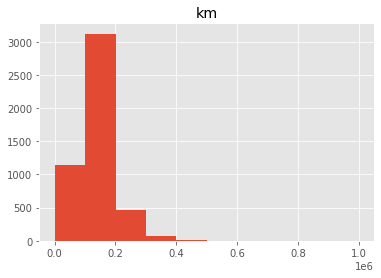

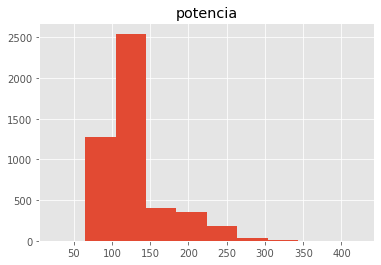

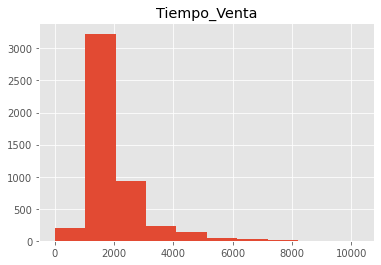

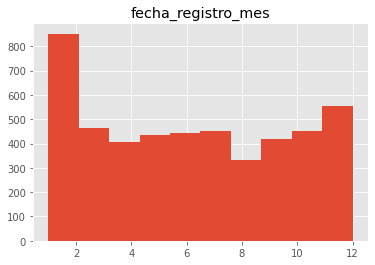

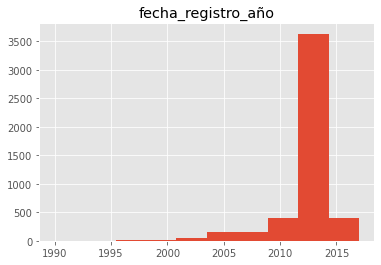

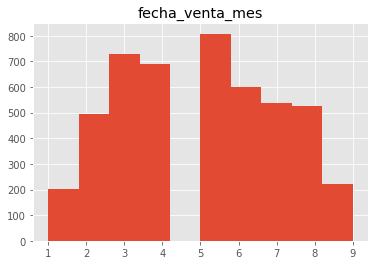

In [ ]:
for i in lista: 
  if i in l_num:
    print(coche_sin_nulos3.hist(i))
  elif i in l_cat or i in l_bool: 
    print(coche_sin_nulos3[i].value_counts())

In [ ]:
del(coche_sin_nulos3['fecha_registro_año'])
del(coche_sin_nulos3['fecha_venta_mes'])

In [ ]:
corr = coche_sin_nulos3.corr()

In [ ]:
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Tiempo_Venta,fecha_registro_mes
km,1.000000,-0.048846,0.064977,0.010347,0.002074,-0.051213,0.047763,-0.029880,0.154612,-0.042080,-0.406430,0.501803,-0.017605
potencia,-0.048846,1.000000,0.327844,0.199712,0.313302,0.449383,0.342223,0.231556,0.005663,0.489713,0.639039,-0.084357,0.001031
volante_regulable,0.064977,0.327844,1.000000,0.307448,0.254079,0.231854,0.280178,0.133229,0.243252,0.224518,0.269268,0.075022,-0.033780
aire_acondicionado,0.010347,0.199712,0.307448,1.000000,0.150125,0.150216,0.286006,0.135438,0.369576,0.225211,0.245641,-0.232598,0.012052
camara_trasera,0.002074,0.313302,0.254079,0.150125,1.000000,0.200913,0.200068,0.144948,0.061450,0.201807,0.251665,0.024050,0.028722
asientos_traseros_plegables,-0.051213,0.449383,0.231854,0.150216,0.200913,1.000000,0.250577,0.154005,0.126268,0.278383,0.415169,-0.054395,-0.017328
elevalunas_electrico,0.047763,0.342223,0.280178,0.286006,0.200068,0.250577,1.000000,0.257315,0.202435,0.333829,0.261545,-0.091009,-0.005619
bluetooth,-0.029880,0.231556,0.133229,0.135438,0.144948,0.154005,0.257315,1.000000,0.129066,0.120228,0.209730,-0.071261,-0.003068
gps,0.154612,0.005663,0.243252,0.369576,0.061450,0.126268,0.202435,0.129066,1.000000,-0.064195,-0.006435,0.076858,-0.014729
alerta_lim_velocidad,-0.042080,0.489713,0.224518,0.225211,0.201807,0.278383,0.333829,0.120228,-0.064195,1.000000,0.444272,-0.183796,-0.000754


In [ ]:
coche_normal = coche_sin_nulos3.copy()

In [ ]:
coche_normal['LOG_precio'] = np.log10(coche_normal['precio'])

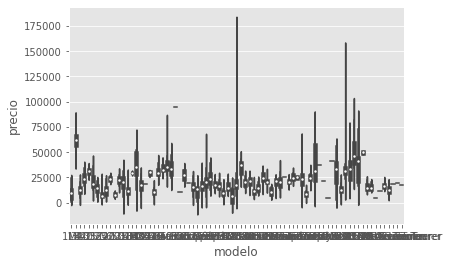

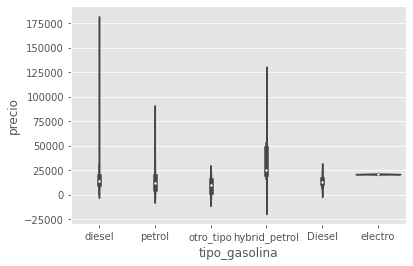

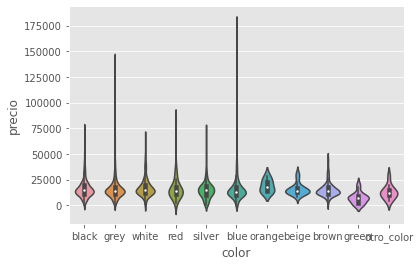

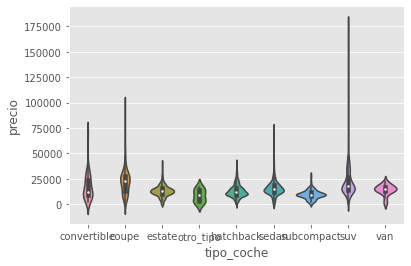

In [ ]:
for i in coche_normal:
  if (coche_normal[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=coche_normal)

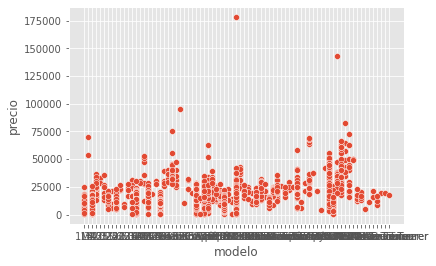

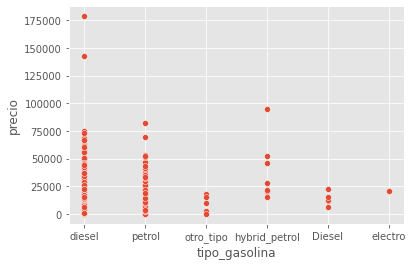

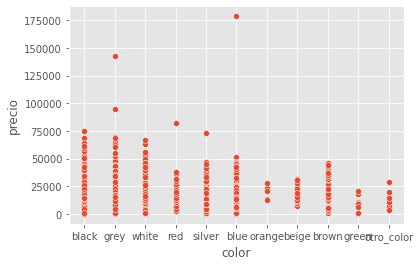

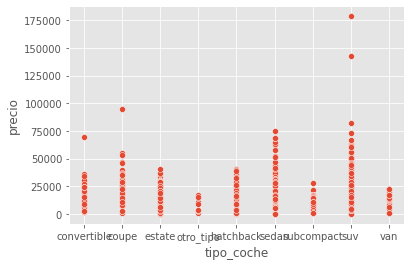

In [ ]:
for i in coche_normal:
  if (coche_normal[i].dtype.kind =="O"):
    plt.figure()
    sns.scatterplot(x = i, y = 'precio', data = coche_normal)

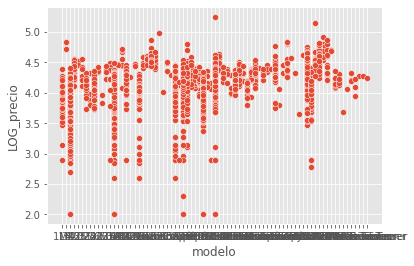

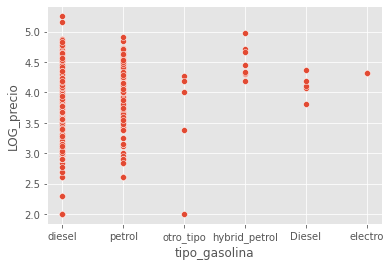

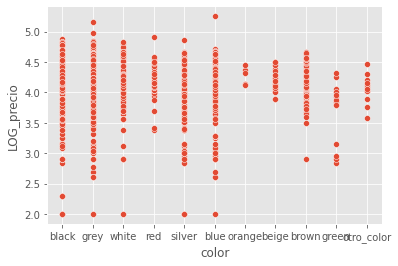

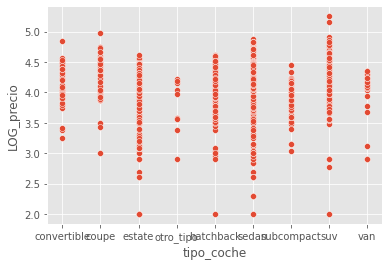

In [ ]:
for i in coche_normal:
  if (coche_normal[i].dtype.kind =="O"):
    plt.figure()
    sns.scatterplot(x = i, y = "LOG_precio", data = coche_normal)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f89cb5350>]],
      dtype=object)

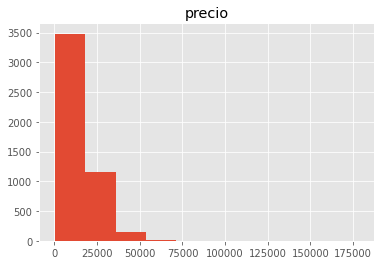

In [ ]:
coche_normal.hist('precio')

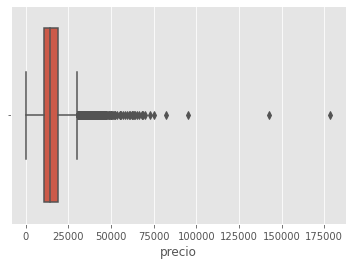

In [ ]:
sns.boxplot(x=coche_normal["precio"])

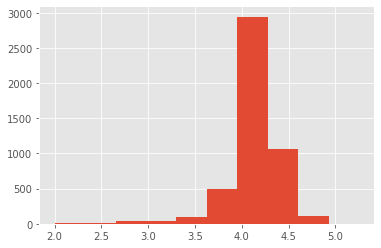

In [ ]:
coche_normal['LOG_precio'] = np.log10(coche_normal['precio'])
coche_normal['LOG_precio'].hist()

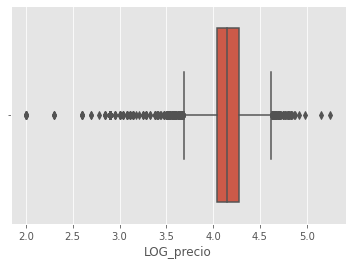

In [ ]:
sns.boxplot(x=coche_normal["LOG_precio"])

In [ ]:
from pandas.core.frame import DataFrame
coche_normal["LOG_precio"].describe()
lista=DataFrame([coche_normal["LOG_precio"].describe()])
q3=lista["75%"]
q1=lista["25%"]
IQR= q3-q1
max=q3+IQR*1.5
min=q1-IQR*1.5

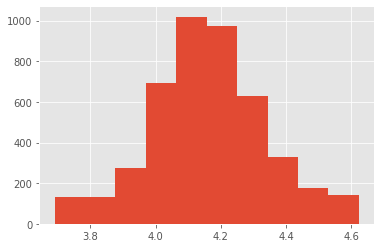

In [ ]:
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_precio"]<min[0])].index), inplace=True)
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_precio"]>max[0])].index), inplace=True)
coche_normal.reset_index(drop=True, inplace=True)
coche_normal["LOG_precio"].hist()

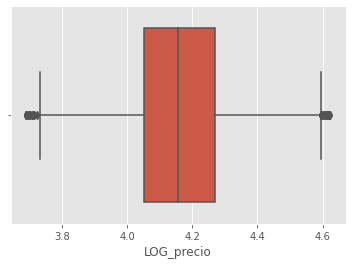

In [ ]:
sns.boxplot(x=coche_normal["LOG_precio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8a0dd090>]],
      dtype=object)

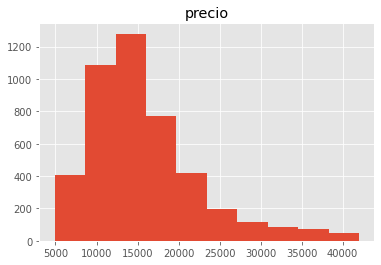

In [ ]:
coche_normal.hist('precio')

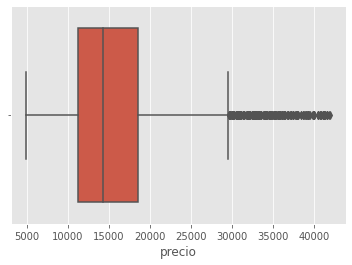

In [ ]:
sns.boxplot(x=coche_normal["precio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8a38eed0>]],
      dtype=object)

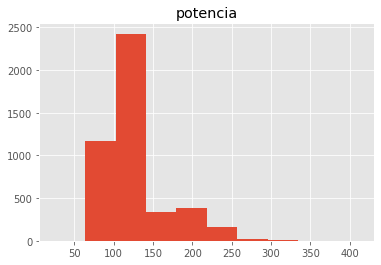

In [ ]:
coche_normal.hist('potencia')

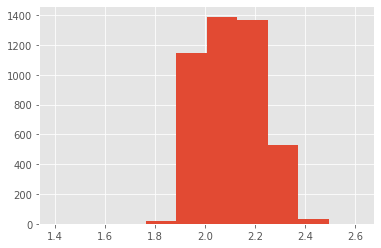

In [ ]:
coche_normal['LOG_potencia'] = np.log10(coche_normal['potencia'])
coche_normal['LOG_potencia'].hist()

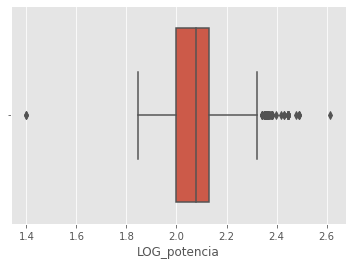

In [ ]:
sns.boxplot(x=coche_normal["LOG_potencia"])

In [ ]:
from pandas.core.frame import DataFrame
coche_normal["LOG_potencia"].describe()
lista=DataFrame([coche_normal["LOG_potencia"].describe()])
q3=lista["75%"]
q1=lista["25%"]
IQR= q3-q1
max=q3+IQR*1.5
min=q1-IQR*1.5

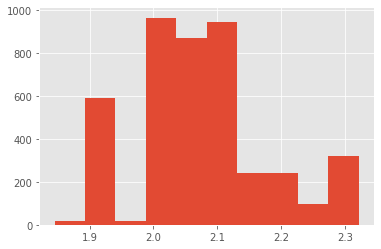

In [ ]:
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_potencia"]<min[0])].index), inplace=True)
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_potencia"]>max[0])].index), inplace=True)
coche_normal.reset_index(drop=True, inplace=True)
coche_normal["LOG_potencia"].hist()

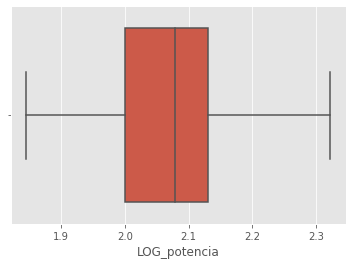

In [ ]:
sns.boxplot(x=coche_normal["LOG_potencia"])

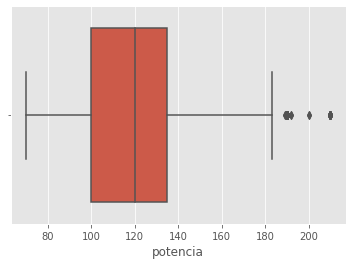

In [ ]:
sns.boxplot(x=coche_normal["potencia"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8a07fa50>]],
      dtype=object)

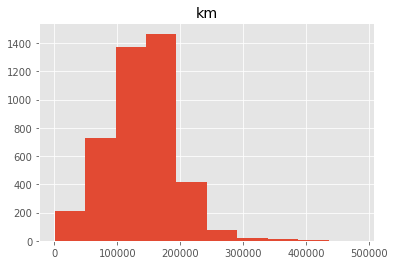

In [ ]:
coche_normal.hist('km')

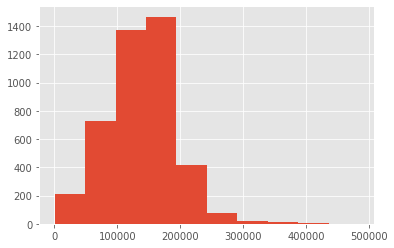

In [ ]:
coche_normal['km'].hist()

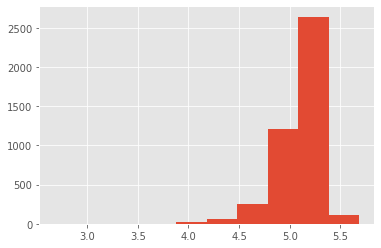

In [ ]:
coche_normal['LOG_km'] = np.log10(coche_normal['km'])
coche_normal['LOG_km'].hist()

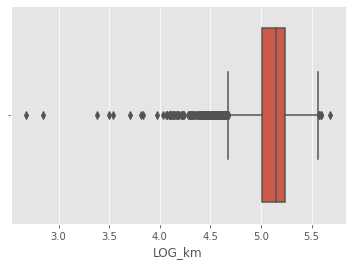

In [ ]:
sns.boxplot(x=coche_normal["LOG_km"])

In [ ]:
from pandas.core.frame import DataFrame
coche_normal["LOG_km"].describe()
lista=DataFrame([coche_normal["LOG_km"].describe()])
q3=lista["75%"]
q1=lista["25%"]
IQR= q3-q1
max=q3+IQR*1.50
min=q1-IQR*1.50

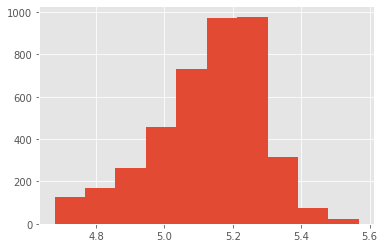

In [ ]:
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_km"]<min[0])].index), inplace=True)
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_km"]>max[0])].index), inplace=True)
coche_normal.reset_index(drop=True, inplace=True)
coche_normal["LOG_km"].hist()

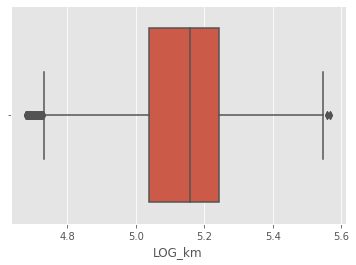

In [ ]:
sns.boxplot(x=coche_normal["LOG_km"])

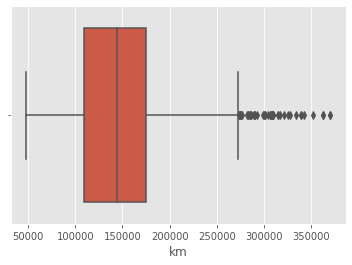

In [ ]:
sns.boxplot(x=coche_normal["km"])

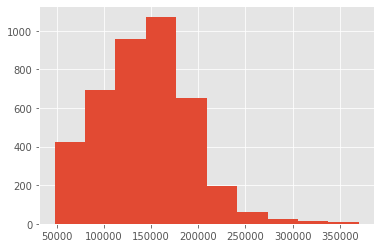

In [ ]:
coche_normal['km'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f89b95d10>]],
      dtype=object)

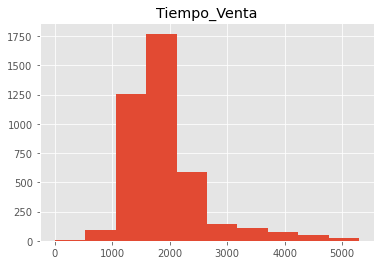

In [ ]:
coche_normal.hist('Tiempo_Venta')

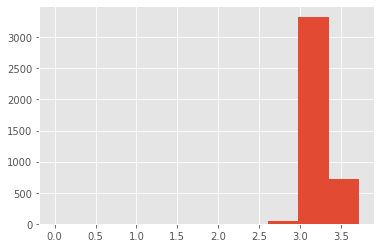

In [ ]:
coche_normal['LOG_Tiempo_Venta'] = np.log10(coche_normal['Tiempo_Venta'])
coche_normal['LOG_Tiempo_Venta'].hist()

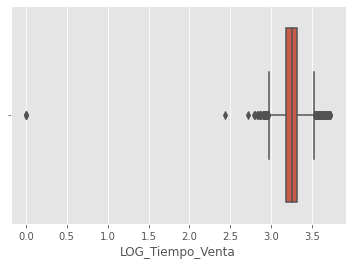

In [ ]:
sns.boxplot(x=coche_normal["LOG_Tiempo_Venta"])

In [ ]:
from pandas.core.frame import DataFrame
coche_normal["LOG_Tiempo_Venta"].describe()
lista=DataFrame([coche_normal["LOG_Tiempo_Venta"].describe()])
q3=lista["75%"]
q1=lista["25%"]
IQR= q3-q1
max=q3+IQR*1.5
min=q1-IQR*1.5

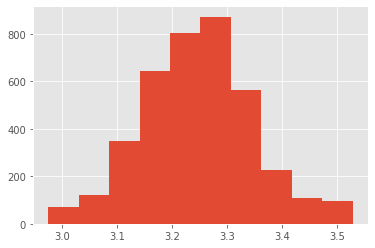

In [ ]:
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_Tiempo_Venta"]<min[0])].index), inplace=True)
coche_normal.drop(index=(coche_normal[(coche_normal["LOG_Tiempo_Venta"]>max[0])].index), inplace=True)
coche_normal.reset_index(drop=True, inplace=True)
coche_normal["LOG_Tiempo_Venta"].hist()

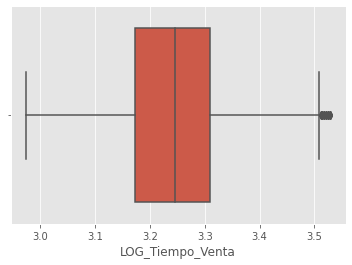

In [ ]:
sns.boxplot(x=coche_normal["LOG_Tiempo_Venta"])

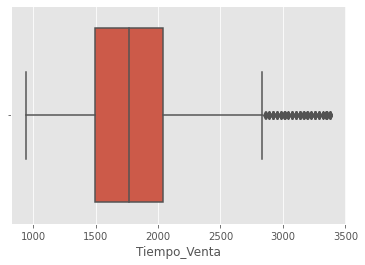

In [ ]:
sns.boxplot(x=coche_normal["Tiempo_Venta"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f898bf3d0>]],
      dtype=object)

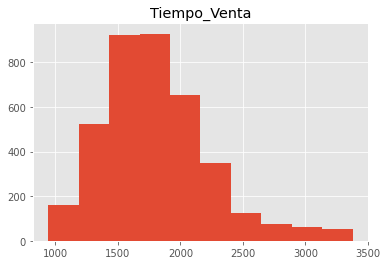

In [ ]:
coche_normal.hist('Tiempo_Venta')

In [ ]:
coche_normal2 =coche_normal.copy()

In [ ]:
coche_normal2['modelo'].value_counts()

320                  635
520                  570
318                  473
X3                   370
116                  305
X1                   256
316                  212
525                  147
530                  136
X5                   125
318 Gran Turismo      93
118                   86
320 Gran Turismo      69
518                   62
X4                    32
420                   32
730                   29
120                   28
330                   24
520 Gran Turismo      23
420 Gran Coupé        22
325                   17
530 Gran Turismo      17
X6                    13
114                   12
218 Active Tourer      9
418 Gran Coupé         6
X5 M                   6
528                    5
328                    5
125                    4
325 Gran Turismo       4
218 Gran Tourer        4
218                    4
216 Active Tourer      2
425                    2
430                    2
430 Gran Coupé         2
335                    2
330 Gran Turismo       2


In [ ]:
from category_encoders import BinaryEncoder

# Creamos el codificador indicandole la columna
encoder = BinaryEncoder(cols=["modelo"])

# Ajustamos el codificador con modelo y la transformamos
encoder.fit(coche_normal2["modelo"])
coche_normal2_binario = encoder.transform(coche_normal2["modelo"])
coche_normal2 = pd.concat([coche_normal2, coche_normal2_binario], axis=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
coche_normal2.loc[:, coche_normal2.columns.str.startswith('modelo')].head()   # son 42 modelos por lo que necesita 2^6 y por tanto 6 columnas para representarlos a todos

,modelo,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5
0,118,0,0,0,0,0,1
1,320,0,0,0,0,1,0
2,420,0,0,0,0,1,1
3,425,0,0,0,1,0,0
4,325,0,0,0,1,0,1


In [ ]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [ ]:
l_num

['km',
 'potencia',
 'Tiempo_Venta',
 'fecha_registro_mes',
 'fecha_registro_año',
 'fecha_venta_mes']

In [ ]:
l_num2 = l_num

In [ ]:
l_num2.pop(5)

'fecha_venta_mes'

In [ ]:
l_num2.pop(4)

'fecha_registro_año'

In [ ]:
l_cat2 = l_cat

In [ ]:
l_cat2.pop(0)

'modelo'

In [ ]:
l_cat2

['tipo_gasolina', 'color', 'tipo_coche']

In [ ]:
coche_normal2 = pd.get_dummies(data=coche_normal2, columns = l_cat2)
coche_normal2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       3857 non-null   object 
 1   km                           3857 non-null   float64
 2   potencia                     3857 non-null   float64
 3   volante_regulable            3857 non-null   int64  
 4   aire_acondicionado           3857 non-null   int64  
 5   camara_trasera               3857 non-null   int64  
 6   asientos_traseros_plegables  3857 non-null   int64  
 7   elevalunas_electrico         3857 non-null   int64  
 8   bluetooth                    3857 non-null   int64  
 9   gps                          3857 non-null   int64  
 10  alerta_lim_velocidad         3857 non-null   int64  
 11  precio                       3857 non-null   float64
 12  Tiempo_Venta                 3857 non-null   float64
 13  fecha_registro_mes

In [ ]:
del(coche_normal2["LOG_precio"])
del(coche_normal2["LOG_km"])
del(coche_normal2["LOG_potencia"])
del(coche_normal2["LOG_Tiempo_Venta"])
del(coche_normal2["modelo"])

In [ ]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    coche_normal2[variable_transformar]=minMaxResultado.fit_transform(coche_normal2[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [ ]:
for i in l_num:
  print(i)

km
potencia
Tiempo_Venta
fecha_registro_mes


In [ ]:
for i in l_num:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [ ]:
coche_final = coche_normal2.copy()

In [ ]:
coche_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           3857 non-null   float64
 1   potencia                     3857 non-null   float64
 2   volante_regulable            3857 non-null   int64  
 3   aire_acondicionado           3857 non-null   int64  
 4   camara_trasera               3857 non-null   int64  
 5   asientos_traseros_plegables  3857 non-null   int64  
 6   elevalunas_electrico         3857 non-null   int64  
 7   bluetooth                    3857 non-null   int64  
 8   gps                          3857 non-null   int64  
 9   alerta_lim_velocidad         3857 non-null   int64  
 10  precio                       3857 non-null   float64
 11  Tiempo_Venta                 3857 non-null   float64
 12  fecha_registro_mes           3857 non-null   float64
 13  modelo_0          

In [ ]:
corr = coche_final.corr()

In [ ]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [ ]:
corr2.stack()

km                     potencia                       0.044664
                       volante_regulable              0.072624
                       aire_acondicionado             0.137261
                       camara_trasera                 0.008913
                       asientos_traseros_plegables   -0.039365
                                                        ...   
tipo_coche_sedan       tipo_coche_suv                -0.296290
                       tipo_coche_van                -0.044895
tipo_coche_subcompact  tipo_coche_suv                -0.074865
                       tipo_coche_van                -0.011344
tipo_coche_suv         tipo_coche_van                -0.039591
Length: 946, dtype: float64

In [ ]:
corr3=corr2.unstack().dropna()

In [ ]:
corr4 = corr3.sort_values()

In [ ]:
pd.set_option("max_rows",None)

In [ ]:
corr4

tipo_gasolina_petrol         tipo_gasolina_diesel          -0.946355
modelo_3                     potencia                      -0.555616
tipo_coche_sedan             tipo_coche_estate             -0.425598
color_grey                   color_black                   -0.400769
modelo_4                     modelo_1                      -0.398172
modelo_5                     potencia                      -0.383062
tipo_coche_suv               tipo_coche_estate             -0.375311
Tiempo_Venta                 precio                        -0.355910
modelo_3                     precio                        -0.353463
                             asientos_traseros_plegables   -0.347052
tipo_coche_hatchback         modelo_4                      -0.305583
modelo_5                     precio                        -0.303895
tipo_coche_hatchback         tipo_coche_estate             -0.303550
tipo_coche_suv               tipo_coche_sedan              -0.296290
tipo_coche_estate            model

In [ ]:
pd.reset_option("max_rows")

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Tiempo_Venta,fecha_registro_mes,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,tipo_gasolina_Diesel,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_otro_tipo,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_otro_color,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,0.044664,0.072624,0.137261,0.008913,-0.039365,0.102503,0.005889,0.170583,0.052882,-0.288882,0.276860,-0.009328,-0.113224,-0.013215,0.021047,0.006946,0.103351,-0.081575,0.008769,0.014545,-0.021775,-0.017374,-0.011666,-0.012673,0.055291,-0.033618,-0.021383,-0.017936,0.010450,-0.003196,0.013052,-0.005591,-0.017474,-0.021955,-0.008621,-0.043405,0.163802,-0.092185,0.007888,0.043241,-0.045119,-0.121237,-0.047885
potencia,0.044664,1.000000,0.295047,0.170819,0.261924,0.423718,0.382831,0.161765,-0.039021,0.492801,0.660032,-0.022134,0.016347,0.208421,0.092671,-0.079557,-0.555616,0.165293,-0.383062,0.009979,-0.045258,-0.026980,-0.009721,0.050154,-0.024018,0.065672,-0.020452,-0.076074,-0.001002,0.009312,0.007986,-0.018881,-0.023931,0.011200,-0.013623,0.025524,0.053604,0.032132,-0.267644,-0.015462,0.049040,-0.178716,0.193503,-0.025547
volante_regulable,0.072624,0.295047,1.000000,0.309339,0.241699,0.197823,0.275612,0.112434,0.233361,0.192845,0.301774,0.102908,-0.026239,0.056688,0.028110,0.096079,-0.109358,0.071357,-0.214429,-0.009133,0.039432,0.015270,-0.010798,-0.038858,-0.026767,0.014580,-0.003180,0.054110,0.014418,0.067434,0.026455,-0.012925,-0.040609,-0.026619,-0.115757,0.049689,-0.003545,0.006092,-0.125690,0.005298,0.063698,-0.082036,0.064407,-0.047962
aire_acondicionado,0.137261,0.170819,0.309339,1.000000,0.127482,0.107255,0.271102,0.130643,0.397892,0.173777,0.209571,-0.082471,0.017510,-0.041826,-0.035254,0.143768,-0.042792,0.040708,-0.151390,0.016965,0.013646,0.007583,-0.010992,-0.017394,0.003733,0.038416,-0.003845,0.042323,0.015172,0.026201,0.013138,0.010779,-0.054301,-0.030735,-0.088953,0.012503,-0.058064,0.125766,-0.100638,-0.020426,0.058984,-0.128073,-0.063060,0.001522
camara_trasera,0.008913,0.261924,0.241699,0.127482,1.000000,0.156878,0.199112,0.108666,0.055662,0.172791,0.242270,0.059210,0.032354,0.106459,0.056751,0.007153,-0.096966,0.018756,-0.094039,0.001730,-0.004636,-0.007583,-0.013138,0.007895,-0.024719,0.011497,-0.001922,-0.010110,0.026627,0.008333,-0.013138,-0.010779,-0.029962,0.000222,-0.000274,-0.032243,-0.009381,-0.014370,-0.032728,0.020426,-0.004719,-0.031435,0.071359,-0.018997
asientos_traseros_plegables,-0.039365,0.423718,0.197823,0.107255,0.156878,1.000000,0.243973,0.099196,0.118058,0.243641,0.475291,-0.037161,-0.026224,0.258915,0.177977,0.092404,-0.347052,-0.123164,-0.159819,0.001831,0.062670,-0.007557,-0.013092,-0.063094,-0.003479,0.022008,-0.025872,-0.041622,-0.015119,-0.012148,0.011092,-0.023924,-0.003761,0.073204,-0.001441,-0.032131,-0.009102,-0.142439,-0.148165,-0.016906,-0.130586,-0.068726,0.473817,-0.018830
elevalunas_electrico,0.102503,0.382831,0.275612,0.271102,0.199112,0.243973,1.000000,0.258553,0.194659,0.311548,0.368742,-0.054452,-0.006736,0.017601,0.054120,-0.008154,-0.182285,0.108652,-0.242534,0.023584,-0.032557,-0.015262,-0.026441,0.035268,-0.032585,0.078260,-0.033708,-0.046307,-0.014402,-0.012614,0.029440,-0.007471,-0.029386,-0.033204,0.022467,0.041776,0.065133,0.061777,-0.096176,-0.005280,0.025169,-0.102586,0.006331,-0.053168
bluetooth,0.005889,0.161765,0.112434,0.130643,0.108666,0.099196,0.258553,1.000000,0.126917,0.088245,0.193483,-0.091641,0.007529,-0.060652,0.058529,-0.028444,-0.126428,-0.023727,-0.019063,0.031507,0.009684,-0.008833,-0.015303,-0.014196,-0.021266,0.033757,-0.000753,-0.064468,0.020535,-0.040514,0.006754,0.008311,0.031324,-0

In [ ]:
coche_resultados = coche_final.copy()

In [ ]:
X = coche_resultados.drop('precio', axis=1)
y = coche_resultados['precio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()    # Creamos el objeto de Regresión Linear
lin_reg.fit(X_train,y_train)   # Entrenamos nuestro modelo

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)   # Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)

In [ ]:
coche_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
from sklearn import metrics

In [ ]:
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))

MAE 1814.381164889913


In [ ]:
print ("MSE", metrics.mean_squared_error(y_test, y_pred))

MSE 6209512.072913669


In [ ]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))   # error cuadrado medio

RMSE 2491.88925775478


In [ ]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [-9.48602525e+03  9.82305478e+03  7.15733908e+02  4.04712833e+02
  4.66441577e+02  1.21155080e+03  9.38871905e+02  7.94429677e+02
  4.63892887e+02  1.48818470e+03 -8.27170871e+03 -5.88306996e+02
  6.69728642e+03  1.56931610e+03  3.60504281e+03 -1.58371282e+03
 -3.66791133e+02 -1.17120908e+03 -1.11869447e+03 -3.59180344e+02
  3.47789380e+03 -4.81126654e+00 -1.99520772e+03 -8.30294917e+02
  2.98990570e+02 -1.12426870e+02  2.19375389e+02  2.42622948e+03
  1.06961937e+02 -2.10550005e+03  4.44744336e+02 -4.39163132e+02
 -5.54704871e+01  4.65537445e+01  6.24642884e+03  3.91221087e+03
 -1.06761045e+03 -1.25897503e+02 -3.44502378e+02  9.63682338e+02
  9.60259559e+02 -2.14149927e+03 -8.40307200e+03]


In [ ]:
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lin_reg.intercept_)

Independent term: 
 13799.047895858408


In [ ]:
coche_resultados["dif"]=coche_resultados["Predicted"]-coche_resultados["Actual"]

In [ ]:
coche_resultados.sort_values(by="dif")

,Actual,Predicted,dif
3380,39900.0,29645.832772,-10254.167228
3386,41100.0,31672.821559,-9427.178441
3207,37500.0,28271.864724,-9228.135276
3677,33200.0,24302.132526,-8897.867474
3713,37200.0,28698.022869,-8501.977131
...,...,...,...
2418,19200.0,27226.757093,8026.757093
2369,6000.0,14452.221023,8452.221023
3104,4900.0,14175.609349,9275.609349
1976,8400.0,18475.477319,10075.477319


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f7e810110>]],
      dtype=object)

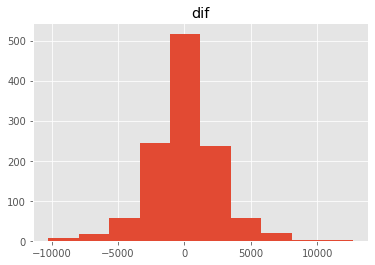

In [ ]:
coche_resultados.hist("dif")

In [ ]:
coche_resultados.shape

(1158, 3)

In [ ]:
coche_final.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Tiempo_Venta,fecha_registro_mes,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,tipo_gasolina_Diesel,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_otro_tipo,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_otro_color,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.287320,0.214286,1,1,0,0,1,1,1,0,11300.0,0.500000,0.090909,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.420297,0.357143,0,0,0,0,1,0,1,0,10200.0,0.488095,0.272727,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,0.248946,0.464286,1,1,0,0,1,1,1,1,25100.0,0.151067,0.545455,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0.153016,0.642857,1,1,0,0,0,1,1,1,33400.0,0.112479,1.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.488270,0.535714,1,1,0,0,1,1,1,1,12400.0,0.925698,0.363636,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


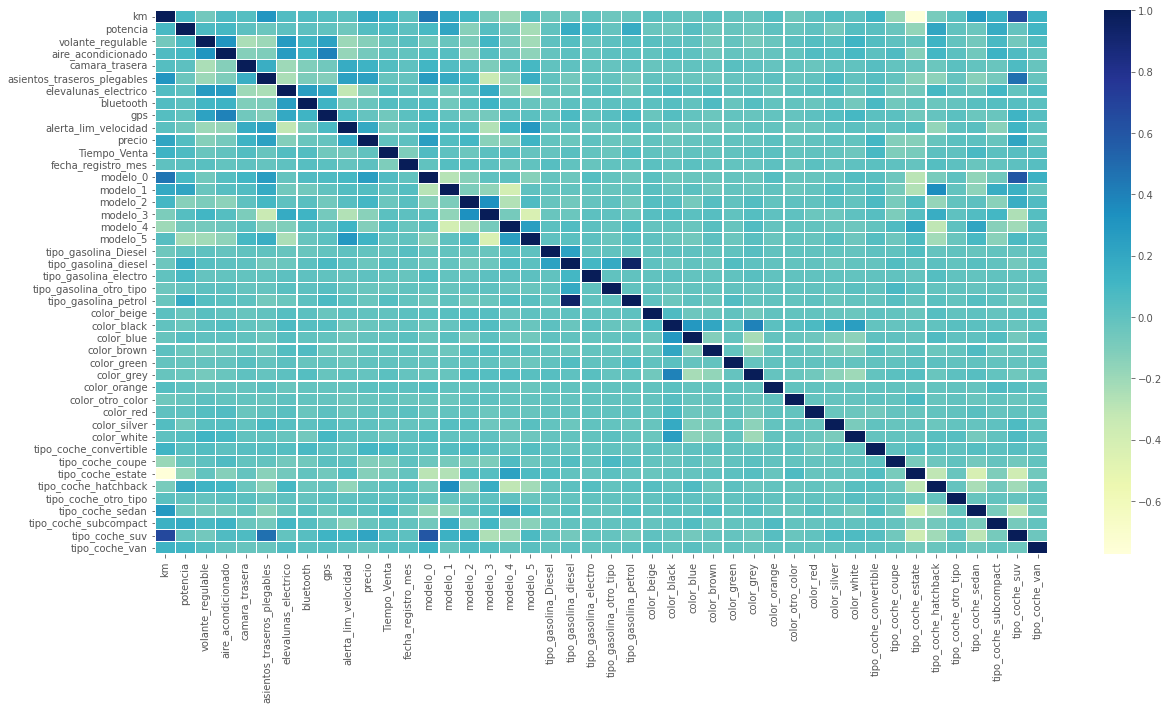

In [ ]:
plt.figure(figsize=(20, 10))
corr = coche_final.apply(lambda x: pd.factorize(x)[0]).corr() 
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [ ]:
X_prueba, y_prueba = coche_final.drop(columns=['volante_regulable'], axis=1), coche_final['volante_regulable']

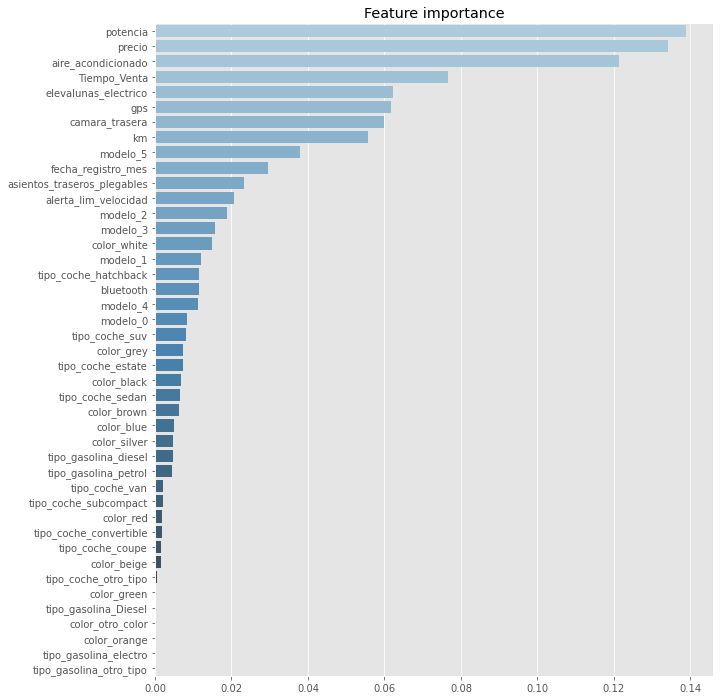

In [ ]:
# entrenamos un RandomForest Classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params)
clf = clf.fit(X_prueba, y_prueba)
# Ploteamos las Features importances
imp = pd.Series(data=clf.feature_importances_, index=X_prueba.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

**FIN**